1) 데이터 가져오기
- 터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.
- 여기에서 데이터를 상세히 확인할 수 있습니다.

In [2]:
import pandas as pd

# CSV 파일 경로
file_path = './data/data/bike-sharing-demand/train.csv'

# CSV 파일을 pandas DataFrame으로 불러오기
train = pd.read_csv(file_path)

# 데이터의 기본 정보 확인
print(train.info())

# 데이터의 처음 몇 행 확인
print(train.head())

# 데이터의 기본 통계 확인
print(train.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None
              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01

(2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
- to_datetime 활용 : 링크 참조
- pandas datetime extract year month day 키워드로 검색해 보기

In [3]:
# datetime 컬럼을 datetime 자료형으로 변환
train['datetime'] = pd.to_datetime(train['datetime'])

# 연, 월, 일, 시, 분, 초 컬럼 생성
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

print(train.head())

             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  day  hour  \
0        81        0.0       3          13     16  2011      1    1     0   
1        80        0.0       8          32     40  2011      1    1     1   
2        80        0.0       5          27     32  2011      1    1     2   
3        75        0.0       3          10     13  2011      1    1     3   
4        75        0.0       0           1      1  2011      1    1     4   

   minute  second  
0       0       0  
1       0       0  
2       0     

(3) year, month, day, hour, minute, second 데이터 개수 시각화하기
- sns.countplot 활용해서 시각화하기
- subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기

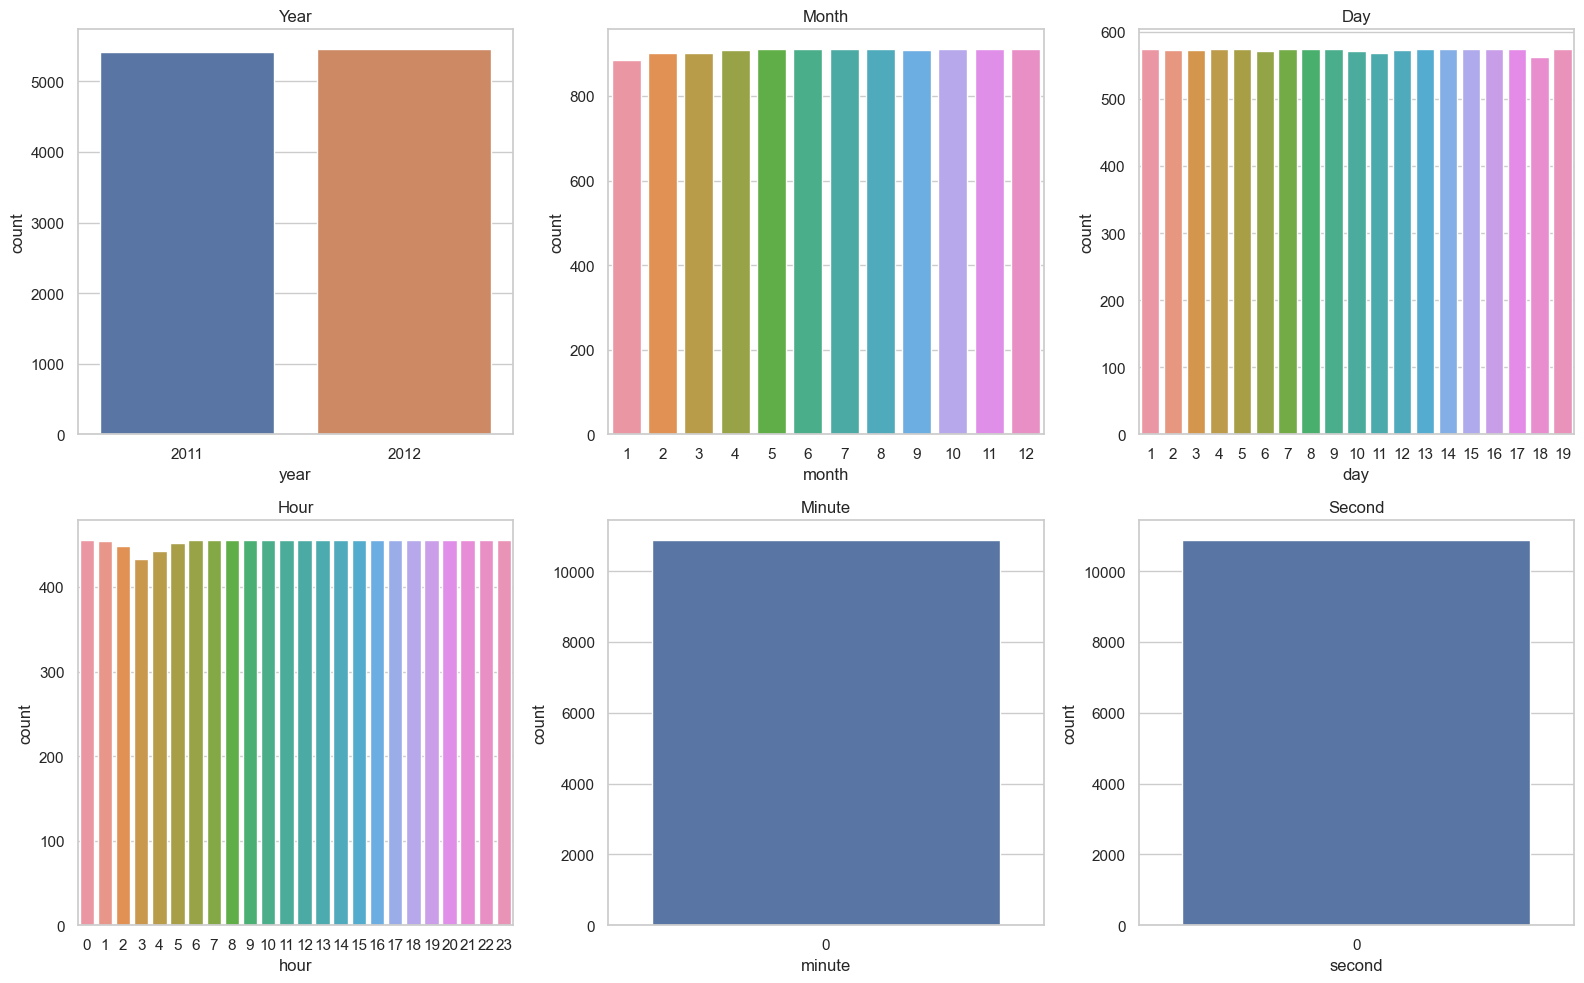

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn 스타일 설정
sns.set(style="whitegrid")

# 각 컬럼에 대한 countplot 생성
plt.figure(figsize=(16, 10))

# 연도
plt.subplot(2, 3, 1)
sns.countplot(data=train, x='year')
plt.title('Year')

# 월
plt.subplot(2, 3, 2)
sns.countplot(data=train, x='month')
plt.title('Month')

# 일
plt.subplot(2, 3, 3)
sns.countplot(data=train, x='day')
plt.title('Day')

# 시간
plt.subplot(2, 3, 4)
sns.countplot(data=train, x='hour')
plt.title('Hour')

# 분
plt.subplot(2, 3, 5)
sns.countplot(data=train, x='minute')
plt.title('Minute')

# 초
plt.subplot(2, 3, 6)
sns.countplot(data=train, x='second')
plt.title('Second')

plt.tight_layout()
plt.show()


(4) X, y 컬럼 선택 및 train/test 데이터 분리
- X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다. ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?
- count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기

In [7]:
from sklearn.model_selection import train_test_split

features = ['year', 'month', 'day', 'hour', 'temp', 'atemp', 'humidity', 'windspeed']
X = train[features]
y = train['count']

# train/test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 분리된 데이터 확인
print("Training set shape: ", X_train.shape, y_train.shape)
print("Test set shape: ", X_test.shape, y_test.shape)

Training set shape:  (8708, 8) (8708,)
Test set shape:  (2178, 8) (2178,)


(5) LinearRegression 모델 학습
- sklearn의 LinearRegression 모델 불러오기 및 학습하기

In [8]:
from sklearn.linear_model import LinearRegression

# LinearRegression 모델 불러오기
model = LinearRegression()

# 모델 학습
model.fit(X_train, y_train)


LinearRegression()

(6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
- 학습된 모델에 X_test를 입력해서 예측값 출력하기
- 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
- mse 값과 함께 rmse 값도 계산하기

In [9]:
from sklearn.metrics import mean_squared_error
import numpy as np

# 테스트 세트에 대한 예측 수행
y_pred = model.predict(X_test)

# MSE 계산
mse = mean_squared_error(y_test, y_pred)

# RMSE 계산
rmse = np.sqrt(mse)

print(f"Test MSE: {mse}")
print(f"Test RMSE: {rmse}")


Test MSE: 19945.334447073
Test RMSE: 141.22795207420165


(7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
- x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
- x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

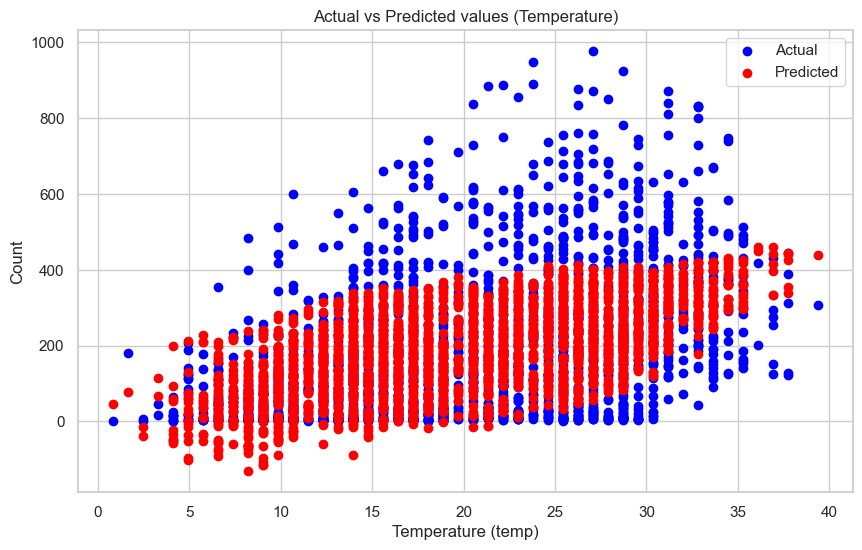

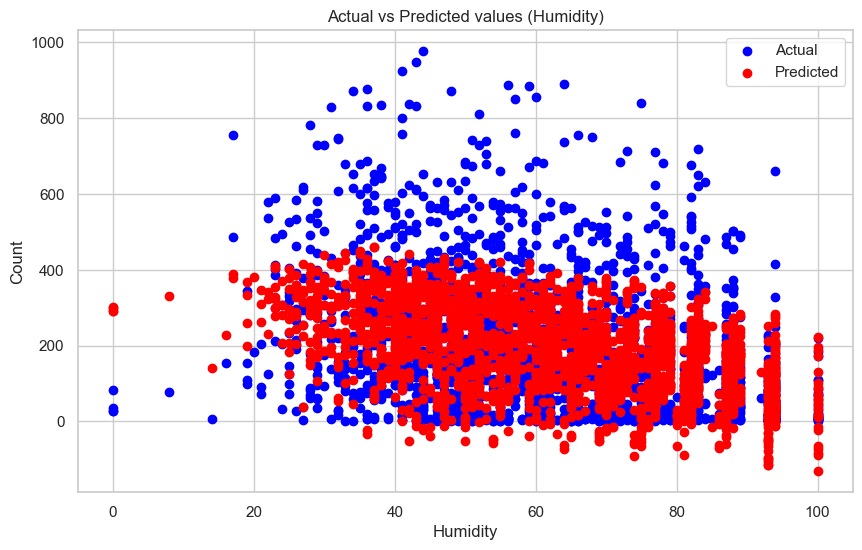

In [10]:
# temp vs count 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_test['temp'], y_test, color='blue', label='Actual')
plt.scatter(X_test['temp'], y_pred, color='red', label='Predicted')
plt.xlabel('Temperature (temp)')
plt.ylabel('Count')
plt.title('Actual vs Predicted values (Temperature)')
plt.legend()
plt.show()

# humidity vs count 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_test['humidity'], y_test, color='blue', label='Actual')
plt.scatter(X_test['humidity'], y_pred, color='red', label='Predicted')
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.title('Actual vs Predicted values (Humidity)')
plt.legend()
plt.show()
